# Module 7: Evaluating Results, Stats in Python

## Topic 1: Types of Data Analytics

### Descriptive Analytics

#### Descriptive analytics is all about giving information about what happened in an easily consumable fashion . It is essentially reporting/dashboarding

### Diagnostic Analytics

#### Diagnostic analytics is focused on determining and reporting why things likely happened

### Predictive Analytics

#### Predictive analytics attempts to predict what will happen in the future based on available information

### Prescriptive Analytics

#### Prescriptive analytics it about making recommendations about what should be done based on available information

## Topic 2: Statistical Significance

### We have to remember as we do our analyses that differences in our results don't necessarily mean we discovered something of interest.  We need to ensure these differences are statistically significant

### Terminology of statistical significance
* Sampling Error
    * This is an estimation of the difference between the entire population and the random subset used as a sample
    * Highly varied populations will increase sampling error
    * Increasing sample size will generally reduce sampling error

* Null Hypothesis
    * This is a statement that you are trying to disprove with your analysis
* Alternative Hypothesis
    * This is a statement that you are trying to prove with your analysis

* p-value
    * Prior to doing a test or analysis, p-value (alpha) minimum bar is assigned.  A lower p-value means there is less chance that the result is due to random chance.  After analysis/test, the actual p-value is calculated. If p-value actual is less than alpha assigned, the null hypothesis is rejected meaning the results are significant

* Alpha (Type 1 Error)
    * The probability of incorrectly rejecting the null hypothesis
* Beta (Type 2 Error)
    * The probability of incorrectly accepting the null hypothesis

* power
    * 1 - Beta
* z-score
    * The z-score is the number of standard deviations away from mean

### Let's create some distributions and try some stats

### Please note that there are a ton of different statistical analysis options.  This is just a sampling to show how to do some of this in Python.

### We'll first create a couple of random normal distributions to work with

In [ ]:
import numpy as np
np.random.seed(seed=1)
rand_norm_1 = np.random.normal(size=1000)# - 1
rand_norm_2 = np.random.normal(size=1000)# + 1
#print(rand_norm_1)
print(type(rand_norm_1))

In [ ]:
import plotly.figure_factory as ff
two_arrays = [rand_norm_1,rand_norm_2]
two_arrays_labels = ["rand_norm_1","rand_norm_2"]
fig = ff.create_distplot(two_arrays, two_arrays_labels, bin_size=.1)
fig.show()

### Let's do some tests with these two datasets.  First, let's check to see if they belong in the same distribution using T-Test (two-tailed test)

In [ ]:
from scipy.stats import ttest_ind, ttest_rel
res = ttest_ind(rand_norm_1, rand_norm_2) # T-Test for two independent samples of values
res2 = ttest_rel(rand_norm_1, rand_norm_2) # T-Test for two related samples of values 
print(res, res2, sep='\n')

### The high p-value here for Ttest_ind tells us these two distributions are likely the same distribution or at least very similar
### The high p-value for Ttest_rel tells us the means of these two distributions are very similar/related

### Now let's just look at one of our distributions to see if it is normally distributed

In [ ]:
from scipy.stats import kstest

res3 = kstest(rand_norm_1, 'norm')

print(res)

### Again, the high p-value tells us this distribution is likely normal

### We can also quickly see some stats about our distribution

In [ ]:
from scipy.stats import describe

res4 = describe(rand_norm_1)
print(res4)

* Skewness is an indication of whether the data is skewed left (negative) or right (positive). Range -1 to 1
* kurtosis is an indication of long tails in either direction. 0 is normal, -1 is light tailed, 1 heavy tailed
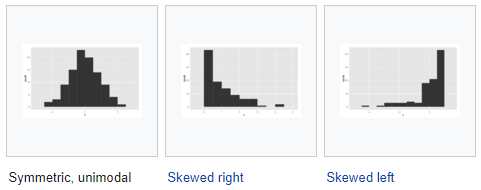

### We can check to see how well our dataset matches a normal distribution

In [ ]:
from scipy.stats import normaltest 
normaltest(rand_norm_1) # uses D’Agostino’s K^2 Test
# Statistic here is the squared z-score + the squared skewtest 

### Remember that many of our machine learning models assume the underlying data is normally(gaussian) distributed so checking this ahead of running models is important.

### Back to looking at both distributions to see how they compare

### Let's do Pearson's Correlation Coefficient to see if the two distributions have a linear relationship

In [ ]:
from scipy.stats import pearsonr
res5 = pearsonr(rand_norm_1,rand_norm_2)
print(res5)

### The tuple returned is the pearson correlation coefficient and the 2 tailed p-value.  A low p-value indicates that the chances of a random set of data having this level or correlation is low
### A high pearson correlation coefficient (either positive or negative) indicates there is a high level or correlation or co-variance between the datasets.  
### This is important because many models assume (especially Naive Bayes) that the data features are independent.

### We should expect this negative result because two normal distributions wouldn't be linear 
### Let's make up some other data to get a linear relationship to show

In [ ]:
from scipy.stats import pearsonr
a = np.array([0,1,2,3,4,5,6,7])
b = np.array([0,-1,-2,-3,-4,-5,-6,-8])
res5a = pearsonr(a,b)
print(res5a)

### We can also check for a non-linear relationship using Spearman correlation

In [ ]:
from scipy.stats import spearmanr
res6 = spearmanr(rand_norm_1,rand_norm_2)
print(res6)

### Again, we should expect a negative result here because our normal datasets won't have a non-linear relationship.  Let's make up another pair of datasets that will have a non-linear relationship

In [ ]:
from scipy.stats import spearmanr
from numpy import random
a = random.rand(1000) * 20
b = a + (random.rand(1000) * 10)
res6a = spearmanr(a,b)
print(res6a)
pyplot.scatter(a, b)
pyplot.show()

### If our data is not passing Guassian/Normal distribution tests, there are situations where we can force our data to become normal

### Take the below distribution of 20 data points

In [ ]:
from matplotlib import pyplot

not_normal_data = 50 * np.random.normal(size=20)+100 #adjust size
pyplot.hist(not_normal_data)
pyplot.show()

In [ ]:
print("kstest - ",kstest(not_normal_data, 'norm'))
print("normal test - ", normaltest(not_normal_data)) # kstest doesn't think it's normal, normaltest does

### The easiest way to ensure we have a normal distribution, if that is what is expected, is to add more data points (assuming more data points are available)

### Another way we can improve our normal distribution test results is to increase resolution.  Take this example where we only have integer level data


In [ ]:
low_res_data_dist = np.random.normal(size=200)
low_res_data_dist = low_res_data_dist.round(0) #adjust number of decimal points
pyplot.hist(low_res_data_dist)
pyplot.show()
print("kstest - ",kstest(low_res_data_dist, 'norm'))
print("normal test - ", normaltest(low_res_data_dist))

### Sometimes the way to correct for a normal distribution is to remove extreme values.  These extreme values may be the result of data collection issues.  We need to be cautious about this because extreme values may also be indication of something interesting in the data.

In [ ]:
from numpy import zeros
data_dist_with_extremes = 5 * np.random.normal(size=100) + 10 # mean around 10 with 5 standard deviation
data_dist_with_extremes = np.append(data_dist_with_extremes, zeros(20)) #add a bunch of zeros
pyplot.hist(data_dist_with_extremes, bins = 20)
pyplot.show()
print("kstest - ",kstest(data_dist_with_extremes, 'norm'))
print("normal test - ", normaltest(data_dist_with_extremes))

### It may also be that the dataset requires a power transform to become expose the normal shape. 
### This can be simplified using a scipy function called boxcox()

### First I'm going to create a sample dataset that has an exponential distribution

In [ ]:
from numpy import exp
data_expon = 5* np.random.normal(size=100) + 50
data_expon = exp(data_expon)
pyplot.hist(data_expon)
pyplot.show()
print("kstest - ",kstest(data_expon, 'norm'))
print("normal test - ", normaltest(data_expon))

In [ ]:
# Note that this only works if the distribution is positive and 1 dimensional
from scipy.stats import boxcox
result, tran_lambda = boxcox(data_expon)
print(tran_lambda)
pyplot.hist(result)
pyplot.show()
print("kstest - ",kstest(result, 'norm'))
print("normal test - ", normaltest(result))

### These are the lambda values for the different types of transformations:
* lambda = -1. is a reciprocal transform.
* lambda = -0.5 is a reciprocal square root transform.
* lambda = 0.0 is a log transform.
* lambda = 0.5 is a square root transform.
* lambda = 1.0 is no transform.

## Topic 3: Reprocibility/Repeatability in Data Science

### This is an important and, at times, challenging topic in data science.  If you come up with a really interesting result but someone else runs through your code or methods and can't repeat your result, it will ultimately be difficult to prove the results are real or of value

### So, how do we ensure what we are creating can be reproduced?

### There are several ways we can control the environment to ensure consistency
* Recording all of the tools, libraries, and library versions used when creating the project
    * Different versions of external libraries can vary enough to skew results
* Build self-contained, consistent environments for data science projects.
    * This includes all of the datasets used, because we can't trust that data outside of our control won't change

* Develop and use a consistent, easy to understand file structure
    * This makes it easy to understand all of the data being used in the project
* Writing tests for your code
    * Running generic/known datasets through your project can help ensure that it is doing what is expected
* Using version control
    

### Lucky for us, some of this can be contained within our Jupyter Notebooks.  

### Watermark is a tool that can let us have a note of the versions of the libraries used in our projects

In [ ]:
pip install watermark

In [ ]:
%load_ext watermark

In [ ]:
%watermark -d -m -v -iv

### Virtual environments can allow all people attempting to recreate your work to have the same versions of all packages.  You'll see more about this in a few weeks in CIS289

### Tools like cookiecutter can allow you to generate a consistent project folder structure.  This is ideal for a large team of data scientists sharing project environements or a way for a single data scientist to keep themselves organized

### For version control, the, by far, most utilized product is github.  Github allows you to keep a history of your project as you develop it.  It also allows others to contribute to your project or pull copies from places in time.
### One of the few things I dislike about Jupyter Notebooks is that it keeps showing checkpoints, as if it is keeping a history.  However, it only keeps a single checkpoint so rolling back isn't an option.  